# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

# Import Dataset

In [11]:
df = pd.read_csv('../Dataset/songs_normalize_preprocessed.csv')
df

,Unnamed: 0,year,explicit,popularity,duration_ms,instrumentalness,acousticness,loudness,speechiness,mode,valence,energy,tempo,danceability,liveness,key,genre
0,0,0.264478,0.0,0.090909,0.865169,0.735225,0.825230,0.090909,0.744639,0.0,0.037084,0.307363,0.000018,0.401082,0.915499,0.232272,pop
1,1,0.145673,0.0,0.045455,0.887640,0.360520,0.891961,0.000000,0.770630,1.0,0.046310,0.010534,0.000000,0.710162,0.690876,0.588118,"rock, pop"
2,2,0.370598,0.0,0.045455,0.741573,0.472813,0.467217,0.636364,0.568584,1.0,0.010492,0.177238,0.000000,0.276007,0.256605,0.509441,"pop, country"
3,3,0.300402,0.0,0.090909,0.876404,0.498818,0.908908,0.000000,0.812877,0.0,0.042330,0.026928,0.000014,0.391461,0.541127,0.397615,"rock, metal"
4,4,0.235918,0.0,0.090909,0.730337,0.573286,0.924796,0.727273,0.776164,0.0,0.051375,0.041784,0.001056,0.075767,0.899454,0.746771,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1742,1742,0.183286,0.0,0.954545,0.887640,0.842790,0.719309,0.090909,0.763366,0.0,0.064399,0.043731,0.000000,0.101624,0.977538,0.516727,pop
1743,1743,0.176281,0.0,0.954545,0.876404,0.500000,0.685415,0.818182,0.731643,1.0,0.242041,0.119860,0.000021,0.100421,0.562520,0.729122,pop
1744,1744,0.236007,0.0,0.954545,0.775281,0.848700,0.659994,0.818182,0.586965,1.0,0.155210,0.068527,0.000000,0.303668,0.826719,0.251704,"hip hop, country"
1745,1745,0.156351,0.0,0.954545,0.842697,0.723404,0.492638,0.727273,0.642405,1.0,0.076700,0.461055,0.000002,0.241130,0.330410,0.284946,pop


## Feature Selection

In [12]:
df.drop(columns=['Unnamed: 0', 'genre', 'popularity', 'mode', 'tempo', 'duration_ms', 'key', 'year'], inplace=True)


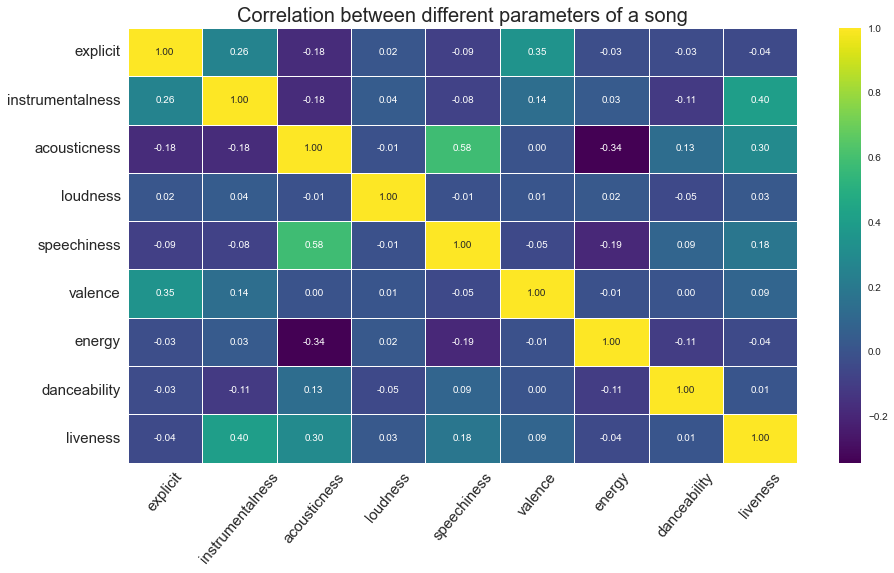

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot = True, linewidths = .5, fmt = '.2f', cmap = "viridis")
plt.title('Correlation between different parameters of a song', size = 20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation = 50)
plt.show()

# Withoout PCA

## Implement KMeans

In [14]:
kmeansInertias = []
c_centers_list = []
for k in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=0, n_init=12) 
    kmeans.fit(df)
    clusterCenters = kmeans.cluster_centers_
    kmeansInertias.append(kmeans.inertia_)
    centroidsTable = pd.DataFrame(clusterCenters, columns=df.columns[:17], index = ['C'+str(i+1) for i in range(len(clusterCenters))])
    
    display(centroidsTable)

,explicit,instrumentalness,acousticness,loudness,speechiness,valence,energy,danceability,liveness
C1,1.000000e+00,0.713970,0.675911,0.500637,0.738692,0.215977,0.105987,0.176829,0.543709
C2,-8.326673e-17,0.618259,0.735159,0.488111,0.755250,0.097908,0.115519,0.189415,0.567444


,explicit,instrumentalness,acousticness,loudness,speechiness,valence,energy,danceability,liveness
C1,1.000000e+00,0.713970,0.675911,0.500637,0.738692,0.215977,0.105987,0.176829,0.543709
C2,-1.110223e-16,0.627331,0.732280,0.767278,0.752059,0.099402,0.116547,0.183148,0.573498
C3,-8.326673e-17,0.609200,0.738033,0.209366,0.758436,0.096416,0.114493,0.195672,0.561400


,explicit,instrumentalness,acousticness,loudness,speechiness,valence,energy,danceability,liveness
C1,1.000000e+00,0.716095,0.675812,0.780865,0.741715,0.224085,0.105324,0.166959,0.555622
C2,-8.326673e-17,0.609200,0.738033,0.209366,0.758436,0.096416,0.114493,0.195672,0.561400
C3,1.000000e+00,0.711525,0.676026,0.178164,0.735214,0.206646,0.106750,0.188186,0.530001
C4,-1.110223e-16,0.627331,0.732280,0.767278,0.752059,0.099402,0.116547,0.183148,0.573498


,explicit,instrumentalness,acousticness,loudness,speechiness,valence,energy,danceability,liveness
C1,1.000000e+00,0.716095,0.675812,0.780865,0.741715,0.224085,0.105324,0.166959,0.555622
C2,-1.110223e-16,0.609372,0.745092,0.128287,0.760751,0.097556,0.102638,0.196857,0.560514
C3,1.000000e+00,0.711525,0.676026,0.178164,0.735214,0.206646,0.106750,0.188186,0.530001
C4,-8.326673e-17,0.703137,0.770908,0.699220,0.765774,0.112693,0.103041,0.181367,0.758682
C5,-1.110223e-16,0.538355,0.685121,0.693969,0.737433,0.082556,0.144261,0.189084,0.371728


,explicit,instrumentalness,acousticness,loudness,speechiness,valence,energy,danceability,liveness
C1,-1.110223e-16,0.546817,0.693383,0.779341,0.739252,0.086404,0.130979,0.190383,0.384395
C2,-1.110223e-16,0.701856,0.770077,0.707500,0.766202,0.111233,0.105092,0.178637,0.756006
C3,1.000000e+00,0.711525,0.676026,0.178164,0.735214,0.206646,0.106750,0.188186,0.530001
C4,-1.110223e-16,0.515554,0.701118,0.226831,0.742721,0.080410,0.134414,0.195425,0.356261
C5,1.000000e+00,0.716095,0.675812,0.780865,0.741715,0.224085,0.105324,0.166959,0.555622
C6,-8.326673e-17,0.692729,0.770159,0.135889,0.771480,0.111121,0.092308,0.196875,0.738022


,explicit,instrumentalness,acousticness,loudness,speechiness,valence,energy,danceability,liveness
C1,-8.326673e-17,0.584927,0.530540,0.606719,0.676527,0.090542,0.383756,0.147811,0.421216
C2,1.000000e+00,0.711525,0.676026,0.178164,0.735214,0.206646,0.106750,0.188186,0.530001
C3,-8.326673e-17,0.697387,0.766916,0.136693,0.770799,0.112307,0.096602,0.196462,0.746357
C4,-8.326673e-17,0.549932,0.754623,0.791723,0.762244,0.086076,0.055831,0.210146,0.398287
C5,1.000000e+00,0.716095,0.675812,0.780865,0.741715,0.224085,0.105324,0.166959,0.555622
C6,-8.326673e-17,0.707584,0.773575,0.708438,0.767378,0.111636,0.093952,0.175740,0.770963
C7,-8.326673e-17,0.504573,0.736430,0.195372,0.756368,0.080612,0.086456,0.201017,0.358208


,explicit,instrumentalness,acousticness,loudness,speechiness,valence,energy,danceability,liveness
C1,1.000000e+00,0.719363,0.676710,0.773893,0.741660,0.221392,0.105881,0.167574,0.563065
C2,-1.387779e-16,0.545177,0.751865,0.797487,0.760008,0.085249,0.060030,0.179514,0.385752
C3,-5.551115e-17,0.577874,0.789448,0.423967,0.776080,0.101158,0.060694,0.528082,0.619804
C4,-8.326673e-17,0.702334,0.763110,0.183313,0.769886,0.109140,0.101797,0.147907,0.744220
C5,-8.326673e-17,0.595445,0.533663,0.605834,0.679179,0.086399,0.395548,0.144735,0.435980
C6,-1.110223e-16,0.503142,0.728017,0.177652,0.753417,0.081820,0.091490,0.173371,0.333925
C7,-8.326673e-17,0.714914,0.770724,0.777033,0.764802,0.114557,0.087784,0.146039,0.773962
C8,1.000000e+00,0.707465,0.674948,0.171040,0.735113,0.209445,0.106116,0.187992,0.520363


,explicit,instrumentalness,acousticness,loudness,speechiness,valence,energy,danceability,liveness
C1,-1.110223e-16,0.705227,0.758340,0.096162,0.767568,0.109375,0.102032,0.162343,0.737797
C2,-8.326673e-17,0.666965,0.790930,0.886151,0.771368,0.118767,0.086725,0.167620,0.721436
C3,1.000000e+00,0.711525,0.676026,0.178164,0.735214,0.206646,0.106750,0.188186,0.530001
C4,1.000000e+00,0.716095,0.675812,0.780865,0.741715,0.224085,0.105324,0.166959,0.555622
C5,-8.326673e-17,0.544706,0.726610,0.731331,0.755214,0.078078,0.058646,0.157073,0.338271
C6,-1.110223e-16,0.591360,0.518874,0.616939,0.669650,0.088902,0.419222,0.141516,0.424222
C7,-8.326673e-17,0.714657,0.755737,0.526033,0.763660,0.106511,0.098950,0.136153,0.770530
C8,-1.110223e-16,0.496443,0.730866,0.136150,0.754221,0.081537,0.094001,0.183783,0.338532
C9,-5.551115e-17,0.565157,0.796072,0.488851,0.775735,0.098336,0.064869,0.533952,0.575820


## KMeans SSE table

In [15]:
kmeansInertiasTable = pd.DataFrame(kmeansInertias, columns=['SSE'], index=list(range(2,10)))
kmeansInertiasTable = kmeansInertiasTable.transpose()
kmeansInertiasTable

,2,3,4,5,6,7,8,9
SSE,480.32837,377.45155,338.617608,302.990406,278.941139,263.772375,251.809169,241.891943


## Elbow Method

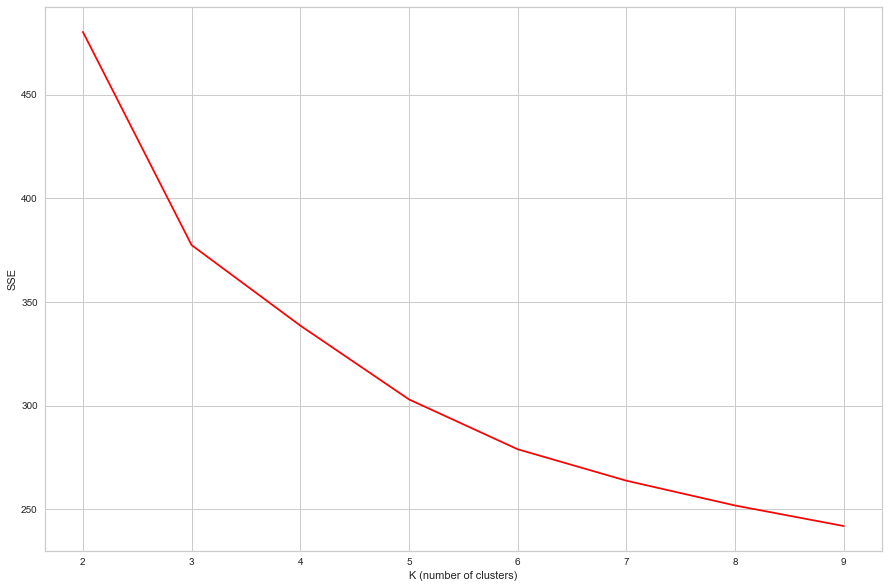

In [16]:
plt.figure(figsize=(15,10))
plt.plot(range(2,10), kmeansInertias, 'x-', color="red")
plt.ylabel('SSE')
plt.xlabel('K (number of clusters)')
plt.show()

## Elbow Method / SSE Plot vs Silhouette Analysis Plot

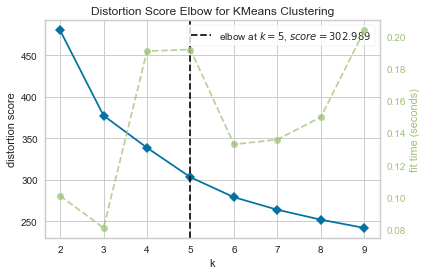

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
km = KMeans(init='k-means++', random_state=0, n_init=12)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df) # Fit the data to the visualizer
visualizer.show() 

## Finding optimal number of clusters

For n_clusters = 2 The average silhouette_score is : 0.4378957489081254
For n_clusters = 3 The average silhouette_score is : 0.28862704001502326
For n_clusters = 4 The average silhouette_score is : 0.2615427948328522
For n_clusters = 5 The average silhouette_score is : 0.22668785077472464
For n_clusters = 6 The average silhouette_score is : 0.2068415678258463
For n_clusters = 7 The average silhouette_score is : 0.2076577976051349
For n_clusters = 8 The average silhouette_score is : 0.2137631732119984
For n_clusters = 9 The average silhouette_score is : 0.19682721687618468


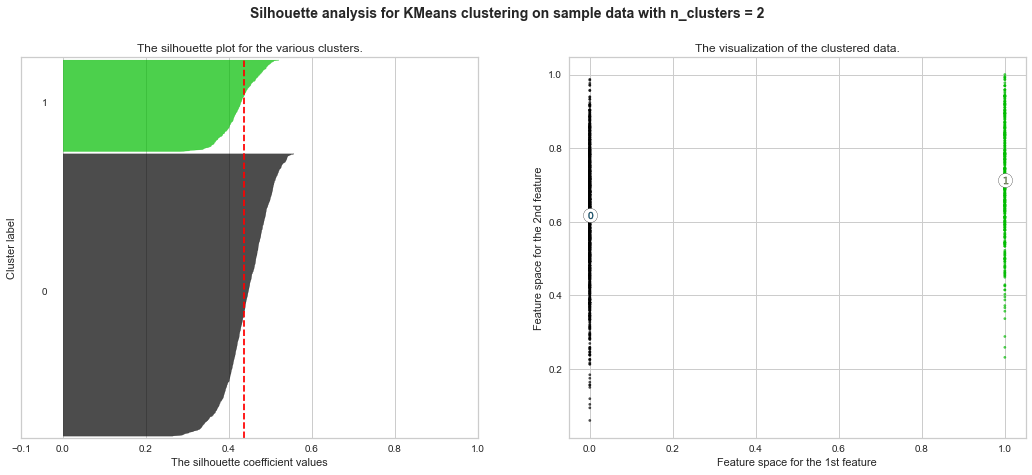

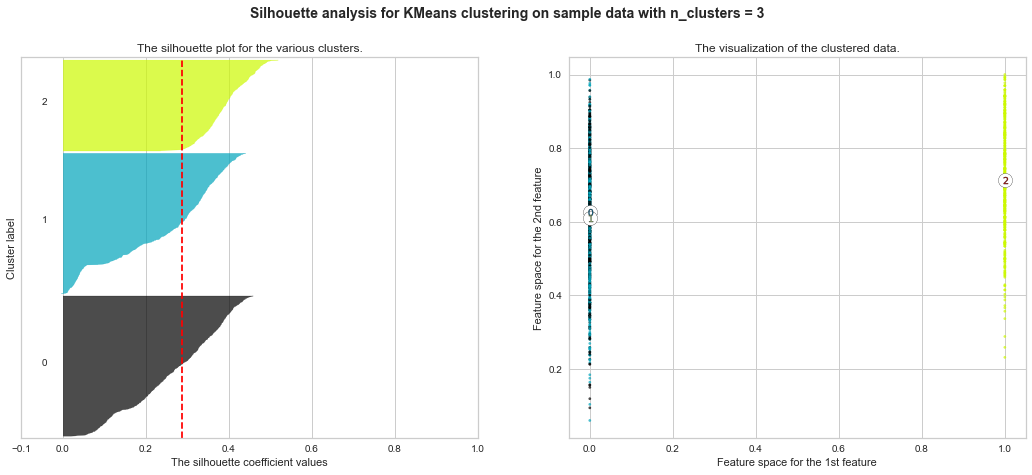

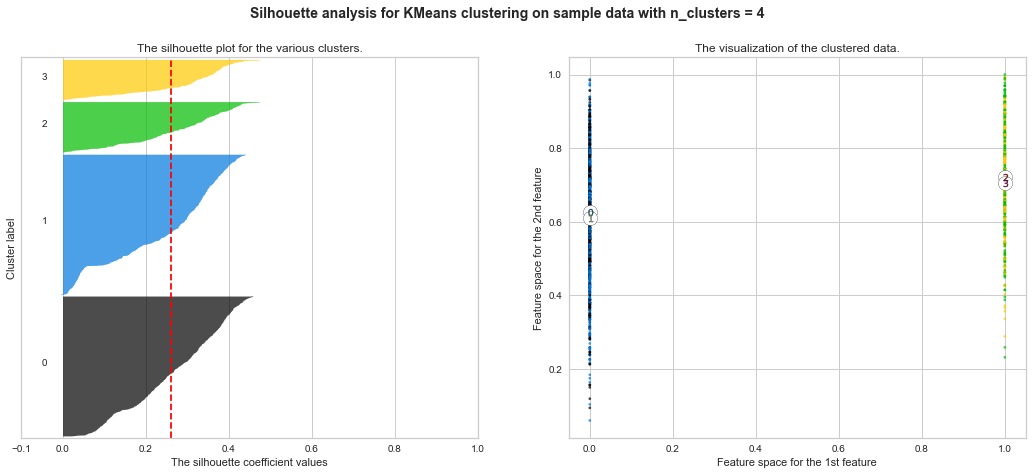

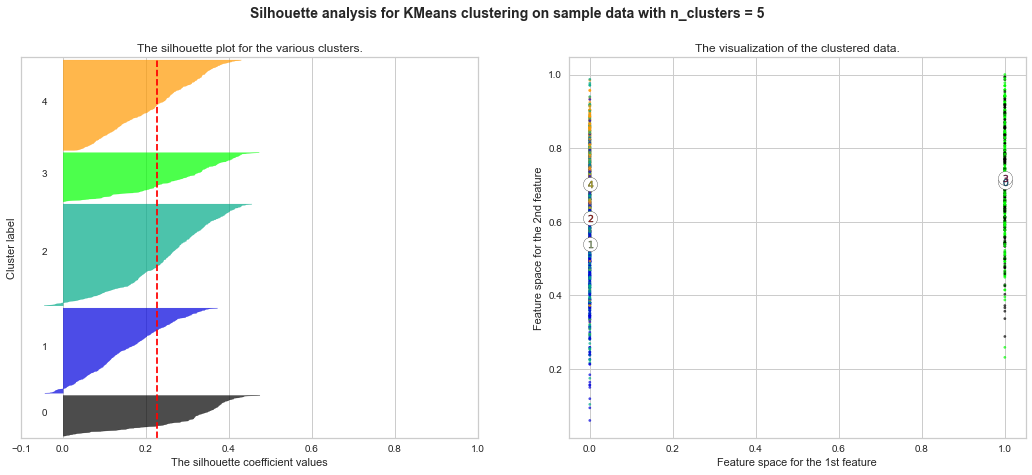

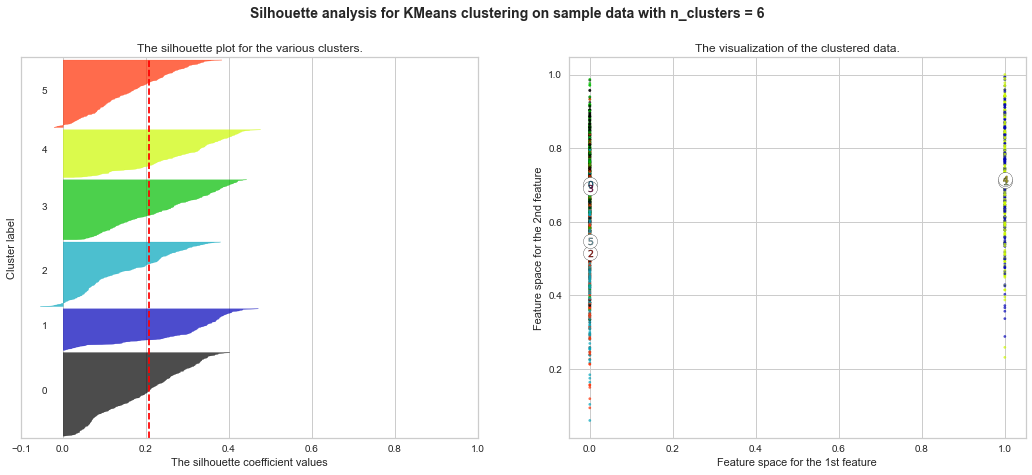

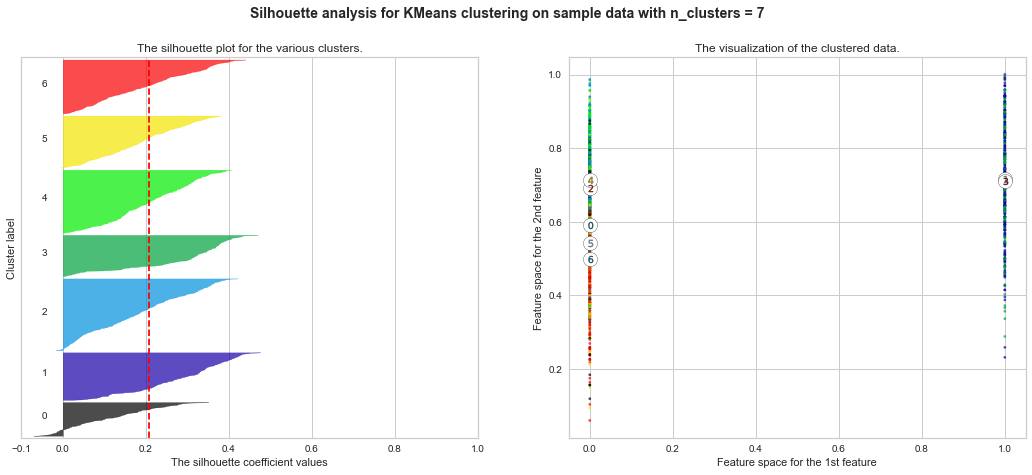

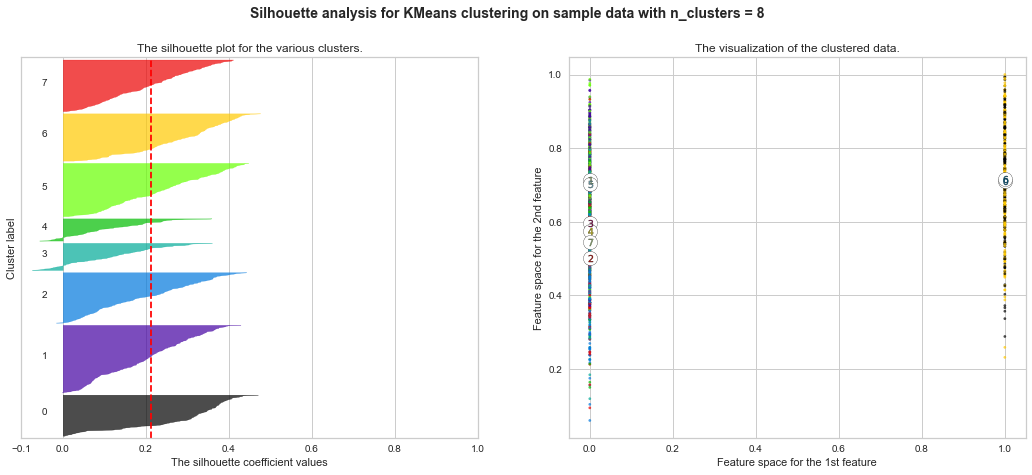

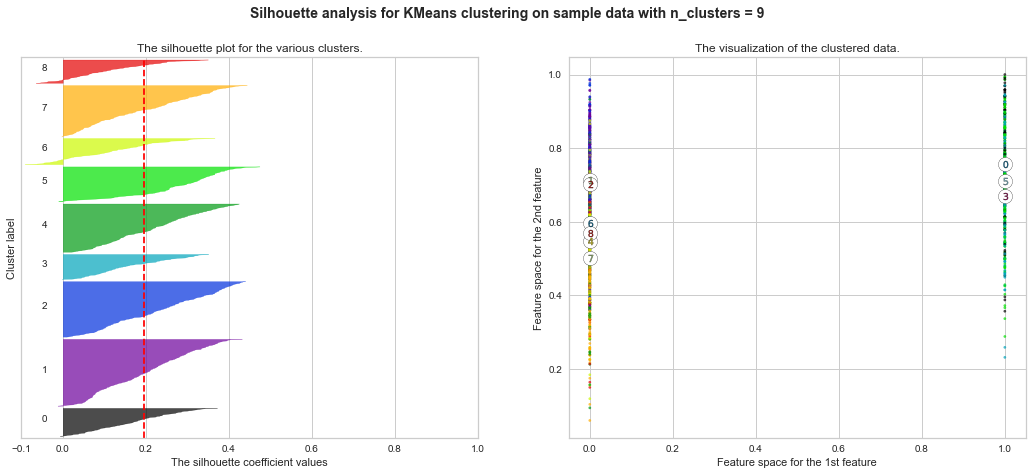

In [19]:
X = df.to_numpy()
silhouette_score_list = []

for n_clusters in range(2, 10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )
    silhouette_score_list.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Silhoutte plot

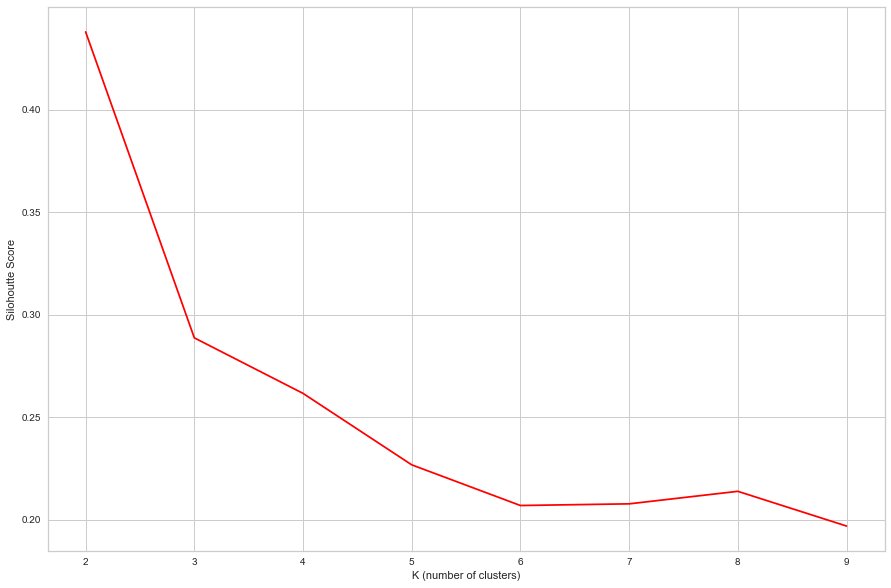

In [20]:
plt.figure(figsize=(15,10))
plt.plot(range(2,10), silhouette_score_list, 'x-', color="red")
plt.ylabel('Silohoutte Score')
plt.xlabel('K (number of clusters)')
plt.show()

# With PCA

## Implementing PCA

In [45]:
Newdf = df.copy()
#Load Data
pca = PCA(2)

#Transform the data
Newdf = pca.fit_transform(df)
data = Newdf.copy()
Newdf = pd.DataFrame(Newdf)

## Implement K-means

In [47]:
kmeansInertias = []
clusterCenters = []
c_centers_list = []
for k in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters=k, random_state=0, n_init=12) 
    kmeans.fit(Newdf)
    clusterCenters = kmeans.cluster_centers_
    c_centers_list.append(clusterCenters)
    kmeansInertias.append(kmeans.inertia_)

## SSE

In [23]:
kmeansInertiasTable = pd.DataFrame(kmeansInertias, columns=['SSE'], index=list(range(2,10)))
kmeansInertiasTable = kmeansInertiasTable.transpose()
kmeansInertiasTable

,2,3,4,5,6,7,8,9
SSE,188.192426,85.40329,46.624478,24.561687,18.178916,12.465417,10.055977,7.995623


## Elbow Method

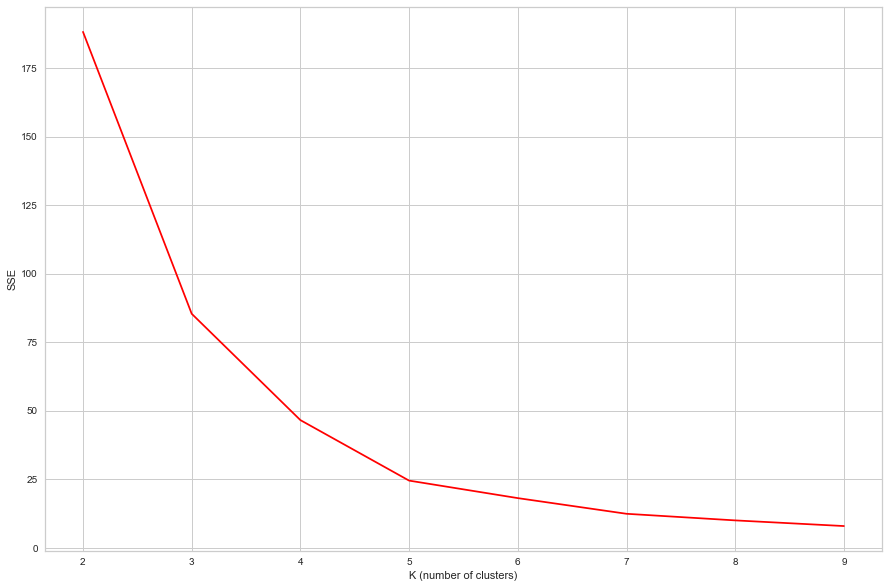

In [24]:
plt.figure(figsize=(15,10))
plt.plot(range(2,10), kmeansInertias, 'x-', color="red")
plt.ylabel('SSE')
plt.xlabel('K (number of clusters)')
plt.show()

## Finding optimal number of clusters with PCA

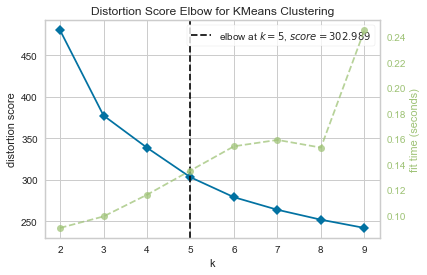

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
km = KMeans(init='k-means++', random_state=0, n_init=12)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(df) # Fit the data to the visualizer
visualizer.show() 

For n_clusters = 2 The average silhouette_score is : 0.658914945230329
For n_clusters = 3 The average silhouette_score is : 0.6137089495935002
For n_clusters = 4 The average silhouette_score is : 0.6221107465259985
For n_clusters = 5 The average silhouette_score is : 0.6256466246334114
For n_clusters = 6 The average silhouette_score is : 0.6164594860367252
For n_clusters = 7 The average silhouette_score is : 0.5968321993831086
For n_clusters = 8 The average silhouette_score is : 0.5974477156522894
For n_clusters = 9 The average silhouette_score is : 0.5983534550036533


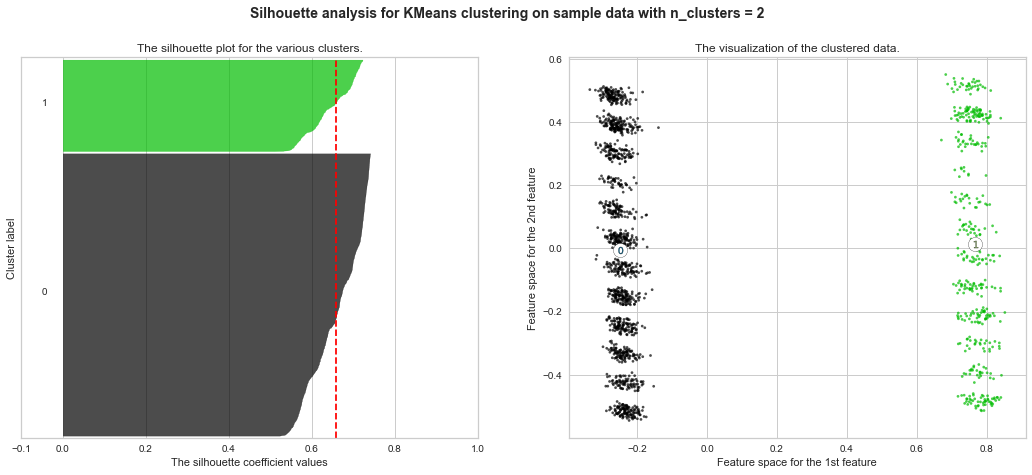

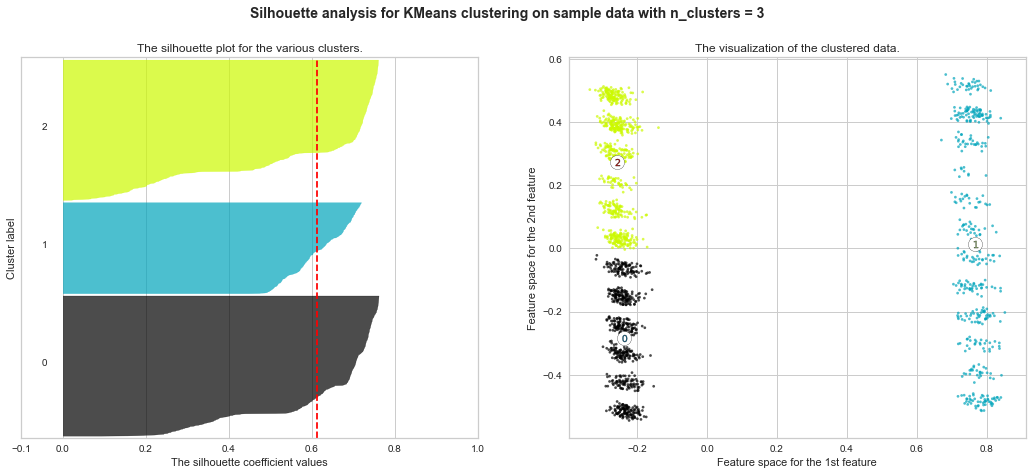

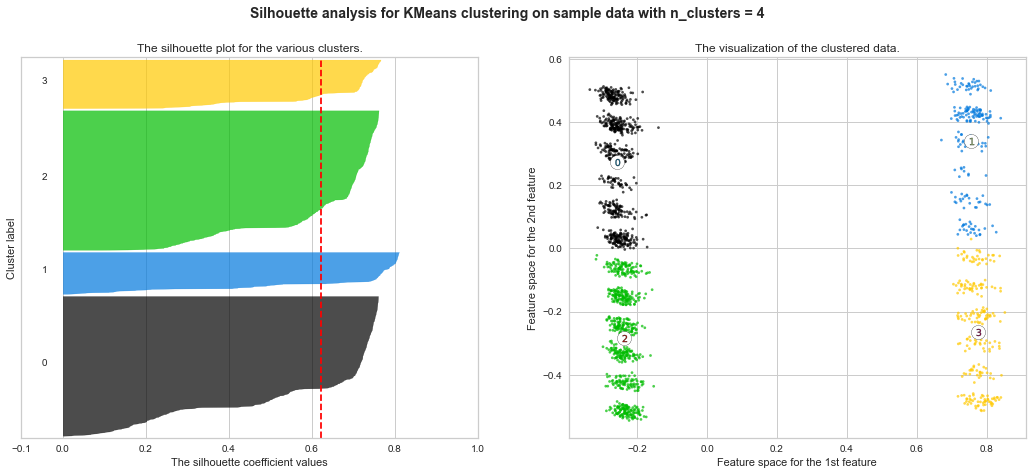

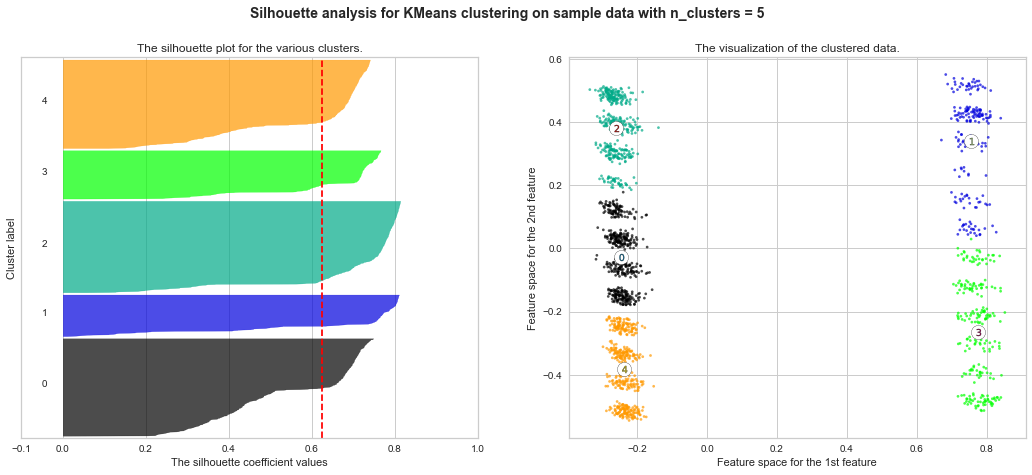

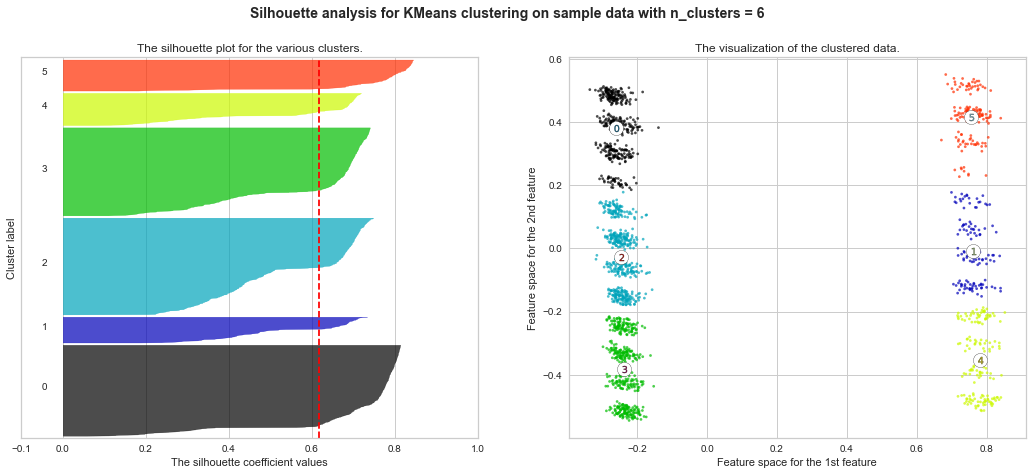

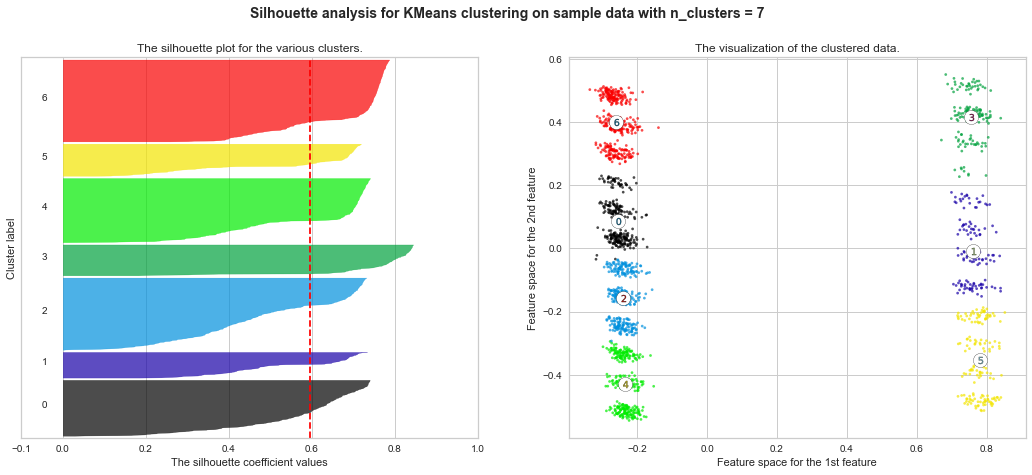

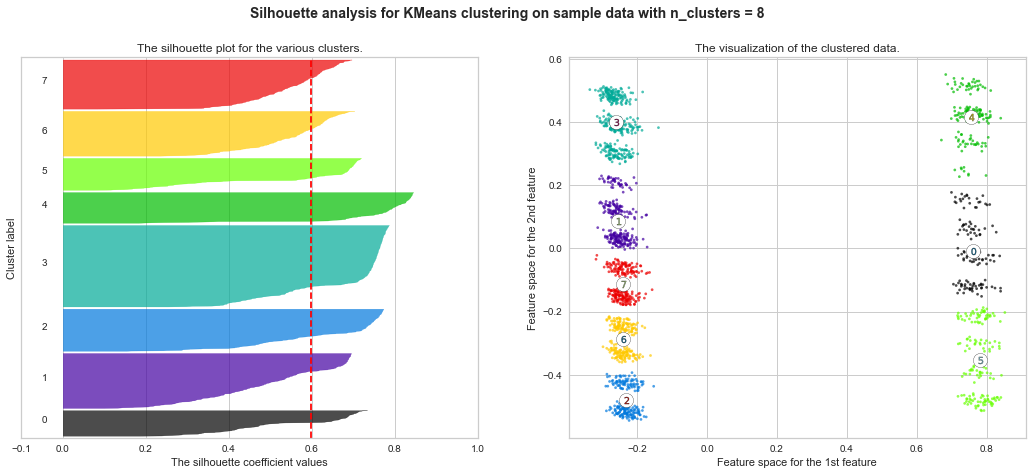

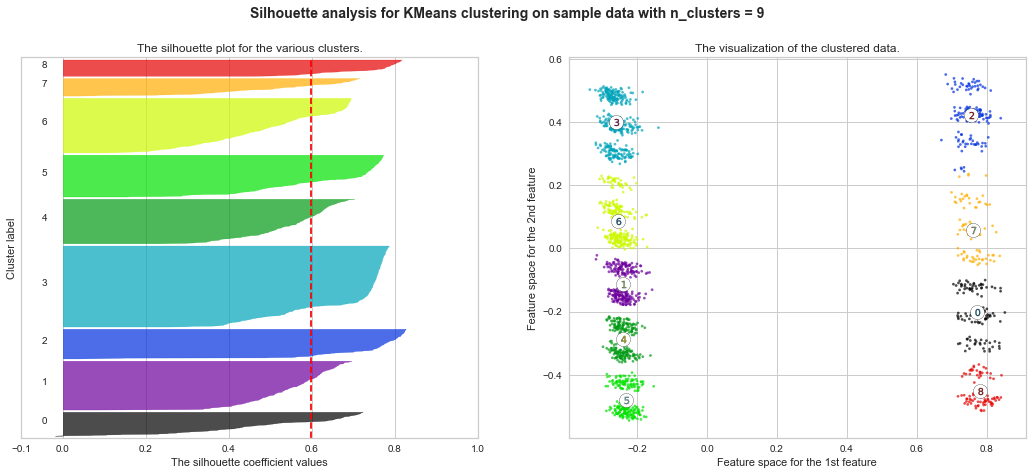

In [26]:
pca = PCA(2)
X = pca.fit_transform(df)

for n_clusters in range(2, 10):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )
    centers = clusterer.cluster_centers_
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

## Silhoutte plot

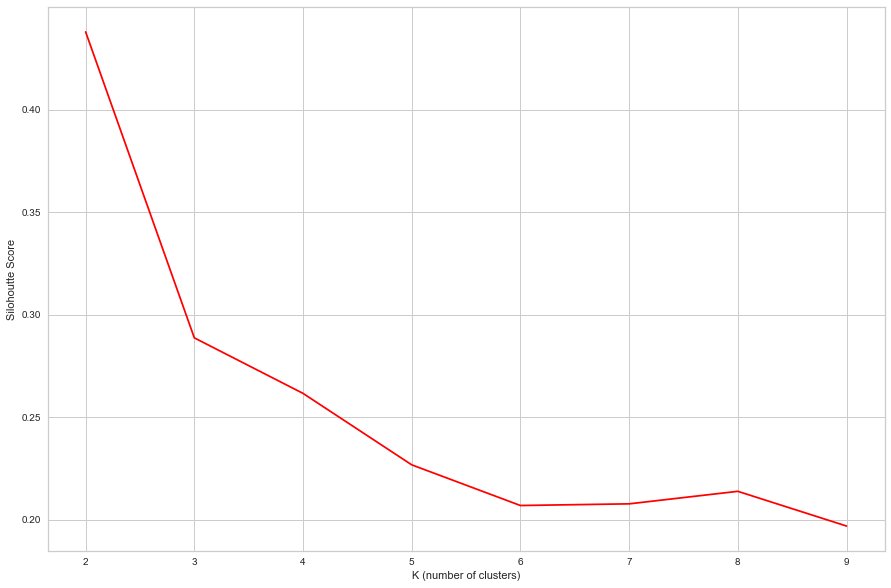

In [27]:
plt.figure(figsize=(15,10))
plt.plot(range(2,10), silhouette_score_list, 'x-', color="red")
plt.ylabel('Silohoutte Score')
plt.xlabel('K (number of clusters)')
plt.show()

In [33]:
centroidsTable

,explicit,instrumentalness,acousticness,loudness,speechiness,valence,energy,danceability,liveness
C1,-1.110223e-16,0.705227,0.758340,0.096162,0.767568,0.109375,0.102032,0.162343,0.737797
C2,-8.326673e-17,0.666965,0.790930,0.886151,0.771368,0.118767,0.086725,0.167620,0.721436
C3,1.000000e+00,0.711525,0.676026,0.178164,0.735214,0.206646,0.106750,0.188186,0.530001
C4,1.000000e+00,0.716095,0.675812,0.780865,0.741715,0.224085,0.105324,0.166959,0.555622
C5,-8.326673e-17,0.544706,0.726610,0.731331,0.755214,0.078078,0.058646,0.157073,0.338271
C6,-1.110223e-16,0.591360,0.518874,0.616939,0.669650,0.088902,0.419222,0.141516,0.424222
C7,-8.326673e-17,0.714657,0.755737,0.526033,0.763660,0.106511,0.098950,0.136153,0.770530
C8,-1.110223e-16,0.496443,0.730866,0.136150,0.754221,0.081537,0.094001,0.183783,0.338532
C9,-5.551115e-17,0.565157,0.796072,0.488851,0.775735,0.098336,0.064869,0.533952,0.575820


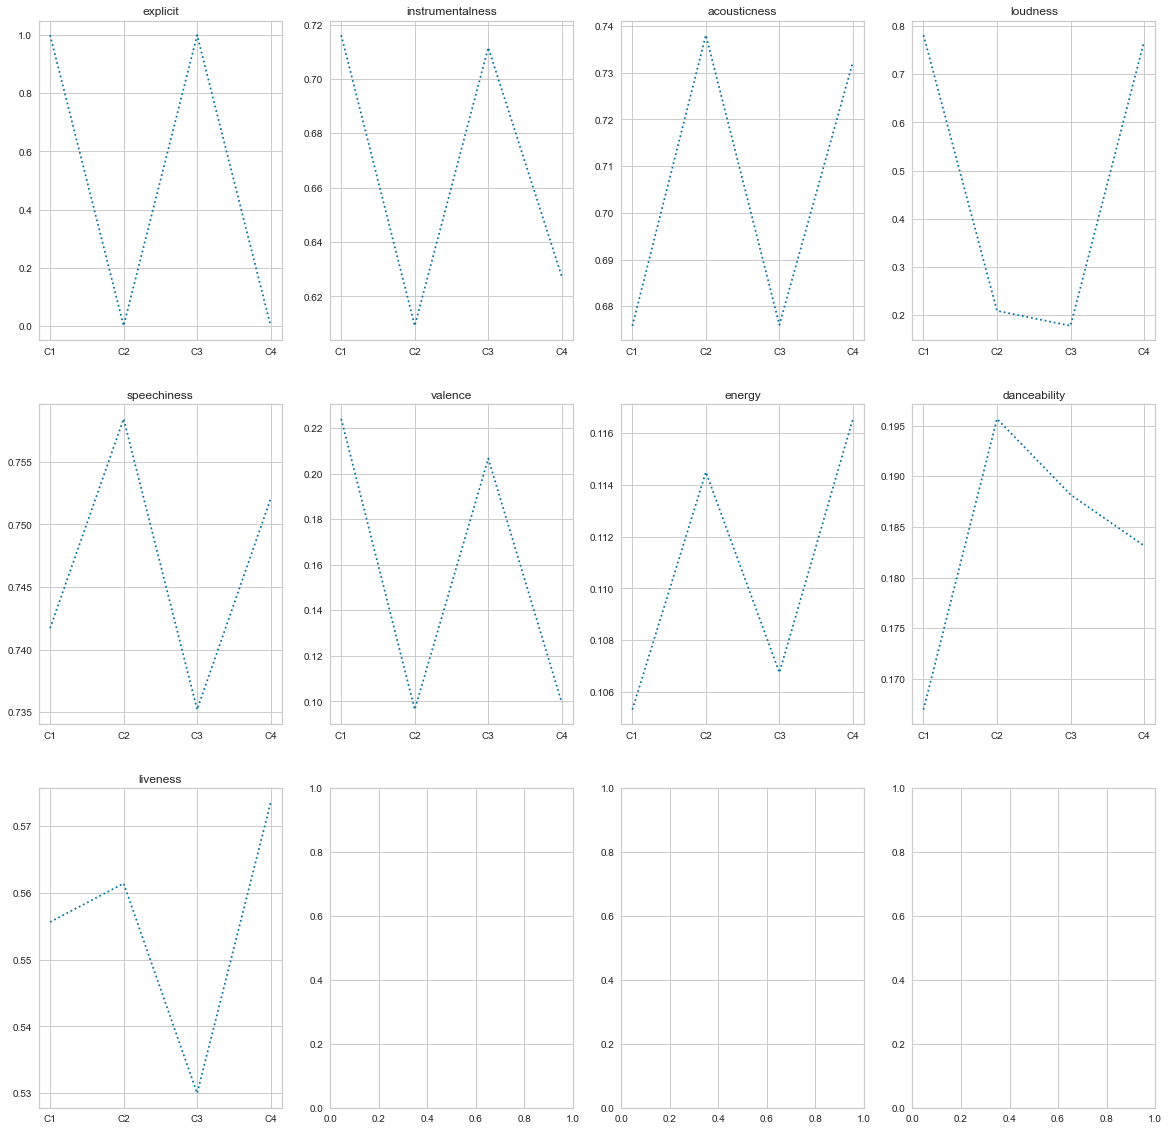

In [44]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(20, 20))
i = 0
j = 0
for col in centroidsTable.columns:
    if j == 4:
        i += 1
        j = 0
    ax[i, j].set(title = col)
    ax[i, j].plot(centroidsTable[col], linestyle = 'dotted')
    j += 1